In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np

# Model

In [ ]:
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Conv2D, Masking, add, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow import image
from tensorflow import float32
from tensorflow.keras import Input

In [ ]:
input_shape=(66,66,1)
# input_shape=(50,50,1)
batch_size=64

In [ ]:
def PSNRLoss(y_true, y_pred):
    """
    PSNR is Peek Signal to Noise Ratio, which is similar to mean squared error.
    It can be calculated as
    PSNR = 20 * log10(MAXp) - 10 * log10(MSE)
    When providing an unscaled input, MAXp = 255. Therefore 20 * log10(255)== 48.1308036087.
    However, since we are scaling our input, MAXp = 1. Therefore 20 * log10(1) = 0.
    Thus we remove that component completely and only compute the remaining MSE component.
    """
    y_true=K.clip(y_true, 0, 1)
    y_pred=K.clip(y_pred, 0, 1)
    # print (type(y_true))
    im1 = image.convert_image_dtype(y_true, float32)
    im2 = image.convert_image_dtype(y_pred, float32)
    return -10. * K.log(K.mean(K.square(im2 - im1))) / K.log(10.)

## SRCNN

In [ ]:
input_img = Input(shape=input_shape)

model = Conv2D(64, (9, 9), padding="same")(input_img)

model= Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(model)

model= Conv2D(1, kernel_size=(5, 5), activation='relu', padding='same')(model)

res_img = model
output_img = add([res_img, input_img])
model = Model(input_img, output_img)


model.compile(loss=rmse,
              optimizer=Adam(),
              # metrics=['accuracy'])
              metrics=[PSNRLoss])

## VDSR

In [ ]:
input_img = Input(shape=input_shape)

model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(input_img)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)

model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)

model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)

model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(model)
model = Activation('relu')(model)
model = Conv2D(1, (3, 3), padding='same', kernel_initializer='he_normal')(model)
res_img = model

output_img = add([res_img, input_img])

model = Model(input_img, output_img)

model.compile(loss=MeanSquaredError(),
              optimizer=Adam(learning_rate=0.01),
              # metrics=['accuracy'])
              metrics=[PSNRLoss])

# Load Weights

In [ ]:
! unzip "/content/drive/My Drive/ISRO SAC Off Campus/5-25km/ckpts_5_25_new.zip"

Archive:  /content/drive/My Drive/ISRO SAC Off Campus/5-25km/ckpts_5_25_new.zip
   creating: ckpts_5_25_new/
  inflating: ckpts_5_25_new/cp-0183.ckpt.data-00000-of-00002  
  inflating: ckpts_5_25_new/cp-0116.ckpt.data-00000-of-00002  
  inflating: ckpts_5_25_new/cp-0183.ckpt.data-00001-of-00002  
  inflating: ckpts_5_25_new/cp-0183.ckpt.index  
  inflating: ckpts_5_25_new/cp-0116.ckpt.data-00001-of-00002  
  inflating: ckpts_5_25_new/cp-0116.ckpt.index  


In [ ]:
model.load_weights('ckpts_5_25_new/cp-0183.ckpt')

# Load Data

## Train Data

In [ ]:
import h5py

In [ ]:
file_name='/content/drive/My Drive/ISRO SAC Off Campus/5-25km/low_1800patches_126days.h5'
data= h5py.File(file_name, 'r')
X=data['samples'][0:1000]

In [ ]:
file_name='/content/drive/My Drive/ISRO SAC Off Campus/5-25km/high_1800patches_126days.h5'
data= h5py.File(file_name, 'r')
Y=data['samples'][0:1000]

# Model Predict

In [ ]:
def psnr(y_true, y_pred):
    assert y_true.shape == y_pred.shape, "Cannot calculate PSNR. Input shapes not same." \
                                         " y_true shape = %s, y_pred shape = %s" % (str(y_true.shape),
                                                                                   str(y_pred.shape))

    return -10. * np.log10(np.mean(np.square(y_pred - y_true)))

In [ ]:
model.load_weights('/content/drive/My Drive/ISRO SAC Off Campus/5-25km/cp-0036.ckpt')

In [ ]:
psnr(X, Y) 

46.35356539795154

In [ ]:
predict_1=model.predict(X)

In [ ]:
psnr(predict_1, Y) #5-25

46.3608709381584

# View the Subimages

In [ ]:
def visible_arrays(trainX):
  """trainX is the array which has normalised integers right out of the CNN
      max_pixel_X is the constant to re-normalise trainX"""
  # trainX_view=ma.masked_equal(trainX*norm_constant, 0)
  trainX=np.clip(trainX, 0, 1)
  trainX_view=ma.masked_equal(trainX, 0)
  return trainX_view

In [ ]:
def view_patch(trainX_view, index):
  """trainX_view is the masked array which was formed from function create_masked_array
    image index is the image you want to see"""
  sst_image=trainX_view[index].reshape(50,50)
  plt.pcolormesh(sst_image)

In [ ]:
X_view=visible_arrays(X)

In [ ]:
Y_view=visible_arrays(Y)

Check 32-Bit 

In [ ]:
X_32=np.float32(X)
X32_view=visible_arrays(X_32)

In [ ]:
Y_32=np.float32(Y)
Y32_view=visible_arrays(Y_32)

In [ ]:
pred_view1=visible_arrays(predict_1)

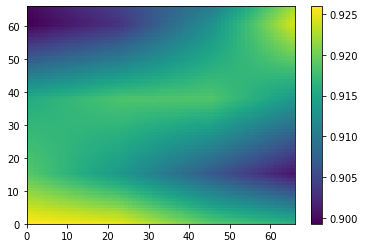

In [ ]:
image=pred_view1[225].reshape((66,66))
plt.pcolormesh(image)
# plt.clim(vmin=0.84, vmax=0.92)
plt.colorbar()

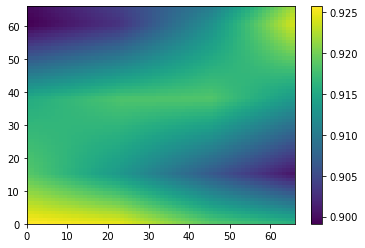

In [ ]:
img_low=X[225].reshape((66,66))
plt.pcolormesh(img_low)
# plt.clim(vmin=0.84, vmax=0.92)
plt.colorbar()

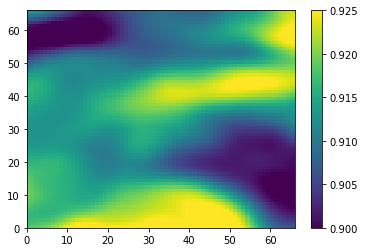

In [ ]:
img_high=Y[225].reshape((66,66))
plt.pcolormesh(img_high)
plt.clim(vmin=0.900, vmax=0.925)
plt.colorbar()